In [2]:
import numpy as np
import pandas as pd

In [3]:
cardio_alco = pd.read_csv('./data/cardio_alco.csv', delimiter=";")
cardio_base = pd.read_csv('./data/cardio_base.csv')
covid_data = pd.read_csv('./data/covid_data.csv')

In [4]:
cardio_base["age"] = round(cardio_base["age"]/365)

In [5]:
cardio_base.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,53.338686,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,0.088129
std,28851.302323,6.765294,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.283484
min,0.000000,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,0.000000
25%,25006.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,0.000000
50%,50001.500000,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,0.000000
75%,74889.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,0.000000
max,99999.000000,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,1.000000


In [6]:
age_groups = [(g, df["weight"].mean()) for g, df in cardio_base.groupby("age")]
pd.DataFrame(age_groups)

,0,1
0,30.0,67.250000
1,39.0,73.633985
2,40.0,71.452852
3,41.0,72.883812
4,42.0,72.074009
5,43.0,73.456522
6,44.0,73.483468
7,45.0,74.083223
8,46.0,73.481083
9,47.0,74.029443


In [7]:
(pd.DataFrame(age_groups)[1].max() - pd.DataFrame(age_groups)[1].min())/pd.DataFrame(age_groups)[1].min()

0.12137546468401479

In [8]:
cardio_base.loc[cardio_base["age"] >= 50, "cholesterol"].mean() - cardio_base["cholesterol"].mean()


0.04873021822570722

In [9]:
cardio_base["cholesterol"].mean()

1.3668714285714285

In [10]:
100 *((1.4156016467971357-1.3668714285714285)/1.3668714285714285)

3.5650915811911514

In [11]:
cardio_base.loc[cardio_base["gender"] == 1, "smoke"].mean()

0.017856358444981332

In [12]:
cardio_base.loc[cardio_base["gender"] == 2, "smoke"].mean()/cardio_base.loc[cardio_base["gender"] == 1, "smoke"].mean()

12.257833097333833

In [13]:
cardio_base["height"].quantile(0.99)

184.0

In [14]:
corr_df = cardio_base.corr(method ="spearman")

In [15]:
corr_df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
id,1.000000,0.002399,0.003506,-0.001886,-0.001292,0.003258,-0.000238,0.005706,-0.003697
age,0.002399,1.000000,-0.020697,-0.083634,0.062979,0.220780,0.157957,0.141935,-0.047535
gender,0.003506,-0.020697,1.000000,0.533805,0.172480,0.063174,0.066374,-0.035730,0.338135
height,-0.001886,-0.083634,0.533805,1.000000,0.313569,0.019381,0.030534,-0.058940,0.197632
weight,-0.001292,0.062979,0.172480,0.313569,1.000000,0.277749,0.254420,0.137908,0.071676
ap_hi,0.003258,0.220780,0.063174,0.019381,0.277749,1.000000,0.735436,0.208722,0.028929
ap_lo,-0.000238,0.157957,0.066374,0.030534,0.254420,0.735436,1.000000,0.167401,0.026172
cholesterol,0.005706,0.141935,-0.035730,-0.058940,0.137908,0.208722,0.167401,1.000000,0.015220
smoke,-0.003697,-0.047535,0.338135,0.197632,0.071676,0.028929,0.026172,0.015220,1.000000


In [16]:
import numpy as np
height_std = cardio_base["height"].std()
height_mean = cardio_base["height"].mean()
height_zscore = (cardio_base["height"] - height_mean) / height_std
100 * (len(height_zscore.values) - len(np.where(height_zscore.values < 2)[0]))/len(height_zscore.values)

2.0557142857142856

In [17]:
cardio_merged = pd.merge(cardio_base, cardio_alco, on="id", how="outer")
cardio_merged = cardio_merged[cardio_merged["age"] >= 50]
cardio_merged.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,alco
count,51251.000000,51251.000000,51251.000000,51251.000000,51251.000000,51251.000000,51251.000000,51251.000000,51251.000000,41695.000000
mean,50029.452342,56.640631,1.336910,164.016566,74.570140,130.212113,98.834950,1.415602,0.080584,0.050030
std,28822.977090,4.305801,0.472659,8.180535,14.257811,139.885201,202.791908,0.720050,0.272198,0.218009
min,0.000000,50.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,0.000000,0.000000
25%,25105.500000,53.000000,1.000000,158.000000,65.000000,120.000000,80.000000,1.000000,0.000000,0.000000
50%,50130.000000,56.000000,1.000000,164.000000,72.000000,120.000000,80.000000,1.000000,0.000000,0.000000
75%,74867.500000,60.000000,2.000000,169.000000,82.000000,140.000000,90.000000,2.000000,0.000000,0.000000
max,99999.000000,65.000000,2.000000,250.000000,183.000000,14020.000000,11000.000000,3.000000,1.000000,1.000000


In [18]:
cardio_merged[cardio_merged["alco"] == 1]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,alco
62,81,56.0,2,187,115.0,130,90,1,0,1.0
101,136,51.0,1,167,80.0,190,90,2,0,1.0
134,180,59.0,2,174,90.0,140,80,1,1,1.0
146,199,50.0,1,160,90.0,130,90,1,0,1.0
230,318,64.0,2,175,75.0,180,100,3,1,1.0
...,...,...,...,...,...,...,...,...,...,...
69873,99799,54.0,2,188,108.0,130,80,2,0,1.0
69909,99858,53.0,2,171,65.0,120,80,1,1,1.0
69915,99864,60.0,2,178,102.0,150,100,1,0,1.0
69925,99882,64.0,1,164,98.0,140,90,2,0,1.0


In [19]:
from scipy import stats
smoker_s_weight = cardio_base.loc[cardio_base["smoke"] == 1, "weight"]
non_smoker_s_weight = cardio_base.loc[cardio_base["smoke"] != 1, "weight"]
t_stat, p_value = stats.ttest_ind(smoker_s_weight, non_smoker_s_weight)
t_stat, p_value

(17.974105126565, 4.517830901143157e-72)

In [20]:
smoker_s_c = cardio_base.loc[cardio_base["smoke"] == 1, "cholesterol"]
non_smoker_s_c = cardio_base.loc[cardio_base["smoke"] != 1, "cholesterol"]
t_stat, p_value = stats.ttest_ind(smoker_s_c, non_smoker_s_c)
t_stat, p_value

(2.7396284742488923, 0.006152424413599285)

In [21]:
smoker_s_blood_p = cardio_base.loc[cardio_base["smoke"] == 1, "ap_hi"]
non_smoker_s_blood_p = cardio_base.loc[cardio_base["smoke"] != 1, "ap_hi"]
t_stat, p_value = stats.ttest_ind(smoker_s_blood_p, non_smoker_s_blood_p)
t_stat, p_value

(-0.24394145890090257, 0.8072768742643271)

In [22]:
smoker_s_blood_p = cardio_base.loc[cardio_base["smoke"] == 1, "ap_lo"]
non_smoker_s_blood_p = cardio_base.loc[cardio_base["smoke"] != 1, "ap_lo"]
t_stat, p_value = stats.ttest_ind(smoker_s_blood_p, non_smoker_s_blood_p)
t_stat, p_value

(1.372119976655746, 0.1700304886397662)

In [23]:
men_blood_p = cardio_base.loc[cardio_base["gender"] == 1, "ap_lo"]
wmen_blood_p = cardio_base.loc[cardio_base["gender"] != 1, "ap_lo"]
t_stat, p_value = stats.ttest_ind(smoker_s_blood_p, non_smoker_s_blood_p)
t_stat, p_value

(1.372119976655746, 0.1700304886397662)

In [24]:
covid_data.head()

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5


In [25]:
german_covid = covid_data.loc[(covid_data["location"] == 'Germany')]
german_covid["total_cases"] = german_covid["new_cases"].cumsum()
ital_covid = covid_data.loc[(covid_data["location"] == 'Italy')]
ital_covid["total_cases"] = ital_covid["new_cases"].cumsum()

/tmp/ipykernel_28025/4277910716.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  german_covid["total_cases"] = german_covid["new_cases"].cumsum()
/tmp/ipykernel_28025/4277910716.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ital_covid["total_cases"] = ital_covid["new_cases"].cumsum()


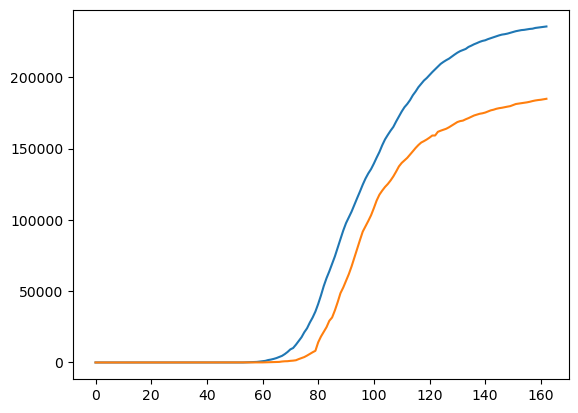

In [26]:
from matplotlib import pyplot as plt
plt.plot(ital_covid["total_cases"].values)
plt.plot(german_covid["total_cases"].values)
plt.show()

In [27]:
ital_covid.iloc[np.argwhere(ital_covid["total_cases"].values - german_covid["total_cases"].values > 10000)[0]]

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand,total_cases
10760,Italy,2020-03-12,2313,196,60461828.0,23.021,35220.084,3.18,12462


In [28]:
selected_ital_ttl_case = ital_covid.loc[(ital_covid["date"] >= "2020-02-28") & (ital_covid["date"] <= "2020-03-20"), "total_cases"]
rel_dates = np.arange(ital_covid.index.max() - ital_covid.index.min())
# selected_ital_rel_date = ital_covid.loc[(ital_covid["date"] >= "2020-02-28") & (ital_covid["date"] <= "2020-03-20"), "total_cases"]

In [49]:
from scipy.optimize import curve_fit
def exponential_func(X, a, b):
    return a * np.exp(b * X)
(a, b ), cov = curve_fit(exponential_func,selected_ital_ttl_case, rel_dates[59:59+22])

/home/arvinnick/anaconda3/envs/musicology/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/arvinnick/anaconda3/envs/musicology/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1003: RuntimeWarning: overflow encountered in square
  cost = np.sum(infodict['fvec'] ** 2)
/tmp/ipykernel_28025/3856262775.py:4: OptimizeWarning: Covariance of the parameters could not be estimated
  (a, b ), cov = curve_fit(exponential_func,selected_ital_ttl_case, rel_dates[59:59+22])


In [50]:
exponential_func(selected_ital_ttl_case, a, b)

/home/arvinnick/anaconda3/envs/musicology/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


10747    1.956200e+282
10748              inf
10749              inf
10750              inf
10751              inf
10752              inf
10753              inf
10754              inf
10755              inf
10756              inf
10757              inf
10758              inf
10759              inf
10760              inf
10761              inf
10762              inf
10763              inf
10764              inf
10765              inf
10766              inf
10767              inf
10768              inf
Name: total_cases, dtype: float64

In [33]:
selected_ital_ttl_case-66

10747      584
10748      822
10749     1062
10750     1623
10751     1970
10752     2436
10753     3023
10754     3792
10755     4570
10756     5817
10757     7309
10758     9106
10759    10083
10760    12396
10761    15047
10762    17594
10763    21091
10764    23914
10765    27914
10766    31440
10767    35647
10768    40969
Name: total_cases, dtype: int64

In [51]:
rel_dates[59:59+22]

array([59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75,
       76, 77, 78, 79, 80])

In [66]:
death_rate = [(country, c_df["new_deaths"].sum()/c_df["population"].mean()) for (country, c_df) in covid_data.groupby("location")]
death_rate = pd.DataFrame(death_rate)
death_rate

,0,1
0,Afghanistan,9.864279e-06
1,Albania,1.181458e-05
2,Algeria,1.651044e-05
3,Andorra,6.600660e-04
4,Angola,1.217053e-07
...,...,...
207,Western Sahara,1.674116e-06
208,World,5.275248e-05
209,Yemen,4.258034e-06
210,Zambia,5.439526e-07


In [67]:
from sklearn.metrics import f1_score

over_65 = [country for (country, c_df) in covid_data.groupby("location") if c_df["aged_65_older_percent"].mean()>20]
# death_rate = pd.DataFrame(death_rate)
over_65

['Bulgaria', 'Finland', 'Germany', 'Greece', 'Italy', 'Japan', 'Portugal']

In [76]:
death_rate[death_rate[0].isin(over_65)][1] > 

30     0.000024
67     0.000058
73     0.000104
76     0.000018
98     0.000563
100    0.000007
154    0.000146
Name: 1, dtype: float64

In [70]:
death_total = [(country, c_df["new_deaths"].sum()) for (country, c_df) in covid_data.groupby("location")]
death_total = pd.DataFrame(death_total)
death_total

,0,1
0,Afghanistan,384
1,Albania,34
2,Algeria,724
3,Andorra,51
4,Angola,4
...,...,...
207,Western Sahara,1
208,World,411195
209,Yemen,127
210,Zambia,10


In [74]:
death_total[death_total[0]=="Bulgaria"]

,0,1
30,Bulgaria,167


In [73]:
covid_data[covid_data["location"].str.startswith("Bulgaria")]

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
3293,Bulgaria,2020-03-08,2,0,6948445.0,20.801,18563.307,7.454
3294,Bulgaria,2020-03-09,2,0,6948445.0,20.801,18563.307,7.454
3295,Bulgaria,2020-03-12,3,1,6948445.0,20.801,18563.307,7.454
3296,Bulgaria,2020-03-13,16,0,6948445.0,20.801,18563.307,7.454
3297,Bulgaria,2020-03-14,8,0,6948445.0,20.801,18563.307,7.454
...,...,...,...,...,...,...,...,...
3381,Bulgaria,2020-06-06,83,13,6948445.0,20.801,18563.307,7.454
3382,Bulgaria,2020-06-07,43,0,6948445.0,20.801,18563.307,7.454
3383,Bulgaria,2020-06-08,16,0,6948445.0,20.801,18563.307,7.454
3384,Bulgaria,2020-06-09,83,4,6948445.0,20.801,18563.307,7.454


In [75]:
167/6948445.0

2.4034154404330752e-05